# 05. Machine Learning

The target on this notebook is to build different models using machine learning to see whicj one is the better model for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import feature_selection

In [2]:
df = pd.read_csv('/users/alfon/Desktop/Master/TFM/CSV/04.cars_features_def.csv')
df.head()

,Year,Kms,Hp,Fuel_cons,Doors,Gear_type_Automatic,Gear_type_Manual,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Electric,...,Type_small,Type_suv,Type_van,Seller_Dealer,Seller_Private,Brand_encoded,Model_encoded,Colour_encoded,Province_encoded,Price_EUR
0,2006,182510,68,4.4,5,0,1,0,1,0,...,1,0,0,1,0,10412.196983,8547.619048,15207.210252,22252.941248,2400
1,2017,67478,125,4.9,5,0,1,0,0,0,...,1,0,0,1,0,25546.556757,16731.591241,15207.210252,22252.941248,14990
2,2007,31510,98,6.6,5,0,1,0,0,0,...,1,0,0,1,0,11099.399408,9136.680000,15207.210252,22252.941248,4950
3,2017,34985,92,0.0,5,1,0,0,0,1,...,1,0,0,1,0,11099.399408,10966.931096,15207.210252,22252.941248,10830
4,2006,83700,174,6.2,5,0,1,0,0,0,...,1,0,0,1,0,17251.958184,19240.750000,15207.210252,22252.941248,9800


Definig the features (X) and the target (y)

In [3]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [4]:
X.shape, y.shape

((28521, 28), (28521,))

Text(0.5, 1.0, 'Price vs Year')

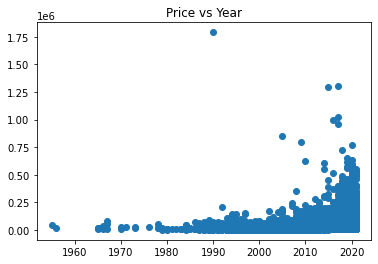

In [5]:
fig, ax = plt.subplots(1,1)
ax.scatter(X[:, 0], y)
plt.title("Price vs Year")

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)


/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_4829/3648555921.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)


,Year,Kms,Hp,Fuel_cons,Doors,Gear_type_Automatic,Gear_type_Manual,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_LPG,Fuel_type_Petrol,Type_cabrio,Type_coupe,Type_familiar,Type_minivan,Type_other,Type_sedan,Type_small,Type_suv,Type_van,Seller_Dealer,Seller_Private,Brand_encoded,Model_encoded,Colour_encoded,Province_encoded,Price_EUR
Year,1.00,-0.63,0.05,-0.45,0.12,0.19,-0.19,0.03,0.03,0.09,0.10,-0.02,-0.08,-0.10,-0.06,0.05,0.02,-0.04,-0.15,0.11,0.12,-0.03,0.39,-0.39,-0.01,0.12,0.07,0.07,0.22
Kms,-0.63,1.00,-0.13,0.17,0.08,-0.14,0.14,-0.03,0.28,-0.10,-0.09,0.01,-0.24,-0.05,-0.05,0.09,0.04,0.01,0.14,-0.14,-0.06,0.09,-0.37,0.37,-0.12,-0.20,-0.06,-0.06,-0.29
Hp,0.05,-0.13,1.00,0.62,-0.41,0.47,-0.47,-0.03,-0.26,0.04,0.05,0.00,0.24,0.11,0.41,-0.07,-0.16,0.00,-0.01,-0.23,-0.01,-0.06,-0.05,0.05,0.66,0.73,0.09,0.18,0.69
Fuel_cons,-0.45,0.17,0.62,1.00,-0.35,0.17,-0.17,-0.01,-0.37,-0.21,-0.13,0.02,0.46,0.15,0.30,-0.12,-0.11,0.02,-0.03,-0.22,0.04,0.04,-0.24,0.24,0.47,0.43,0.03,0.07,0.34
Doors,0.12,0.08,-0.41,-0.35,1.00,-0.20,0.20,0.03,0.25,0.02,0.04,-0.00,-0.28,-0.59,-0.73,0.20,0.20,0.02,0.25,0.21,0.26,0.06,0.03,-0.03,-0.31,-0.32,-0.07,-0.06,-0.28
Gear_type_Automatic,0.19,-0.14,0.47,0.17,-0.20,1.00,-1.00,-0.02,-0.03,0.10,0.17,0.01,-0.04,0.07,0.19,-0.04,-0.10,-0.01,-0.00,-0.16,0.07,-0.08,0.03,-0.03,0.26,0.29,0.04,0.12,0.28
Gear_type_Manual,-0.19,0.14,-0.47,-0.17,0.20,-1.00,1.00,0.02,0.03,-0.10,-0.17,-0.01,0.04,-0.07,-0.19,0.04,0.10,0.01,0.00,0.16,-0.07,0.08,-0.03,0.03,-0.26,-0.29,-0.04,-0.12,-0.28
Fuel_type_CNG,0.03,-0.03,-0.03,-0.01,0.03,-0.02,0.02,1.00,-0.06,-0.00,-0.01,-0.00,-0.05,-0.02,-0.02,-0.01,-0.01,-0.00,0.01,0.02,0.02,-0.01,0.03,-0.03,-0.02,-0.01,-0.02,-0.01,-0.01
Fuel_type_Diesel,0.03,0.28,-0.26,-0.37,0.25,-0.03,0.03,-0.06,1.00,-0.09,-0.18,-0.02,-0.93,-0.18,-0.16,0.16,0.15,0.00,0.01,-0.12,0.07,0.10,-0.05,0.05,-0.16,-0.17,-0.06,-0.03,-0.17
Fuel_type_Electric,0.09,-0.10,0.04,-0.21,0.02,0.10,-0.10,-0.00,-0.09,1.00,-0.01,-0.00,-0.07,0.01,-0.03,-0.03,0.01,-0.00,0.00,0.06,-0.01,-0.01,0.05,-0.05,0.01,0.03,0.02,0.03,0.04


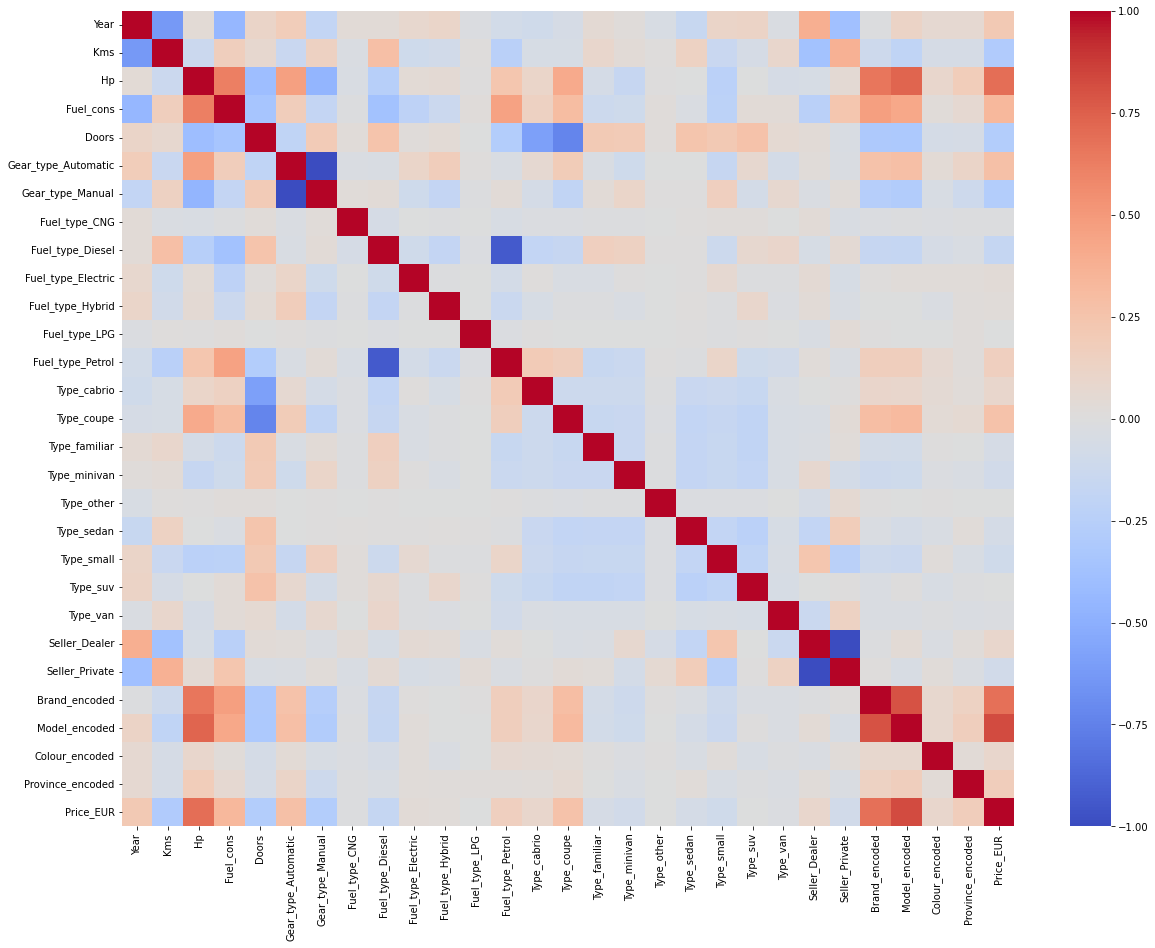

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1) 
plt.savefig('/users/alfon/Desktop/Master/TFM/Figs/05.corr.png')

In [8]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .2)

## Models

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.coef_

array([ 2.32843619e+02, -5.90429570e-02,  1.24340819e+02, -1.58998763e+03,
        7.98893245e+02, -1.76550060e+03,  1.76550060e+03,  3.04699062e+03,
        2.63141036e+03, -1.00584444e+04,  1.69040418e+03,  5.55004544e+02,
        2.13463471e+03,  2.53924668e+03, -2.93869330e+03, -1.00071383e+03,
        6.82157856e+02, -3.03428565e+03, -2.33222112e+03, -3.87259629e+02,
       -1.30504834e+03,  7.77681733e+03,  5.21263006e+02, -5.21263006e+02,
        1.37090147e-01,  6.75214782e-01,  6.38976519e-02,  1.19315159e-01])

In [14]:
y_pred = lr.predict(X_test)

In [15]:
y_pred[:10]

array([-1847.20716162,  8975.78239098,   803.81740388, 20885.9817671 ,
       31262.38187266, 24837.64259668, 24550.25374152,  8399.35624417,
        6221.7387528 , 24302.9772901 ])

In [16]:
y_test

array([ 5140,  8990,  8200, ..., 14364,  5000, 17990])

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 6.000e+00, 9.000e+00, 2.300e+01, 4.784e+03, 8.470e+02,
        2.500e+01, 4.000e+00]),
 array([-854455.65243519, -803823.14165406, -753190.63087293,
        -702558.12009179, -651925.60931066, -601293.09852953,
        -550660.5877484 , -500028.07696727, -449395.56618614,
        -398763.05540501, -348130.54462388, -297498.03384274,
        -246865.52306161, -196233.01228048, -145600.50149935,
         -94967.99071822,  -44335.47993709,    6297.03084404,
          56929.54162517,  107562.05240631,  158194.56318744]),
 <BarContainer object of 20 artists>)

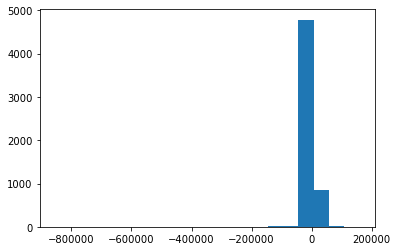

In [17]:
fig, ax = plt.subplots(1,1)
ax.hist(y_pred - y_test, bins=20)

In [18]:
from sklearn import metrics
print('R2:', lr.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Percentage Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.7488669313637286
Mean Absolute Error: 7032.121581333472
Mean Percentage Absolute Error: 0.5682066650628621
Mean Squared Error: 484293734.1495857
Root Mean Squared Error: 22006.67476357084


### Having a look to the features selection

In [19]:
rfe = feature_selection.RFE(estimator=lr, n_features_to_select=1, step=1)

In [20]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [21]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

The best feature to select aacording to the rfe is the feature Coupe_category by removing features

In [22]:
rfe.ranking_

array([16, 28, 22,  9, 13,  2, 20,  8,  7,  3, 10,  6,  4, 21,  1, 18, 23,
       11, 15, 19, 14, 12, 17,  5, 25, 24, 27, 26])

In [23]:
scores_rfe = []
for i in range(1,X_train.shape[1] + 1):
    lr = LinearRegression()
    rfe = feature_selection.RFE(estimator=lr,n_features_to_select=i,step=1)
    rfe.fit(X_train, y_train)
    lr.fit(X_train[:,rfe.support_], y_train)
    scores_rfe.append(lr.score(X_test[:,rfe.support_],y_test))

In [24]:
scores_rfe

[0.06215752269184904,
 0.11912272911788901,
 0.11871962896802468,
 0.1386831230020903,
 0.14643465140952527,
 0.14643241923118266,
 0.14638308185980187,
 0.14637277294810036,
 0.22201702821803626,
 0.22201702821803637,
 0.22201909650385354,
 0.22198217868594572,
 0.22410243124949691,
 0.22411556836755442,
 0.2242552534393878,
 0.35416286436239486,
 0.3541628643623945,
 0.35422736815714917,
 0.3546156825769847,
 0.3546156825769854,
 0.35461568257698617,
 0.5143926025289092,
 0.5143926025289092,
 0.7538167810212725,
 0.7453029624232101,
 0.7457689004943615,
 0.7458731747647718,
 0.748866931363737]

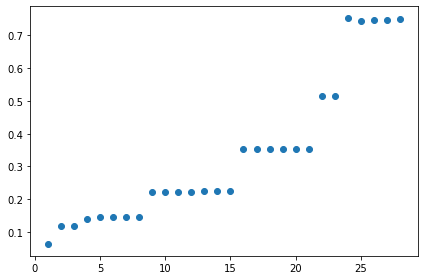

In [25]:
fig, ax = plt.subplots(1,1)
ax.scatter(range(1, X_train.shape[1] + 1),scores_rfe)
plt.tight_layout()

In [26]:
lr = LinearRegression()
sfs = feature_selection.SequentialFeatureSelector(estimator=lr,n_features_to_select=1,direction="forward")
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=1)

In [27]:
sfs.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [28]:
scores_sfs = []
for i in range(1,X_train.shape[1]):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(estimator=lr,n_features_to_select=i,direction="forward")
    sfs.fit(X_train, y_train)
    lr.fit(X_train[:,sfs.support_], y_train)
    scores_sfs.append(lr.score(X_test[:,sfs.support_],y_test))

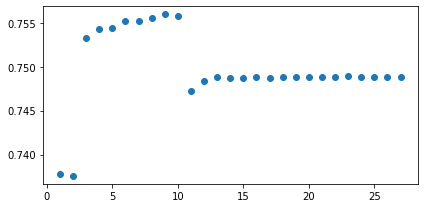

In [29]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.scatter(range(1, X_train.shape[1]),scores_sfs)
plt.tight_layout()

In [30]:
scores_sfs_b = []
for i in range(1,X_train.shape[1]):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(estimator=lr,n_features_to_select=i,direction="backward")
    sfs.fit(X_train, y_train)
    lr.fit(X_train[:,sfs.support_], y_train)
    scores_sfs_b.append(lr.score(X_test[:,sfs.support_],y_test))

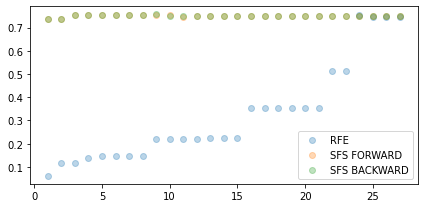

In [31]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.scatter(range(1, X_train.shape[1]),scores_rfe[:-1], label="RFE", alpha = .3)
ax.scatter(range(1, X_train.shape[1]),scores_sfs, label = "SFS FORWARD", alpha = .3)
ax.scatter(range(1, X_train.shape[1]),scores_sfs_b, label = "SFS BACKWARD", alpha = .3)
ax .legend()
plt.tight_layout()

In [32]:
feature_names = df[df.columns[:-1]].columns.tolist()


In [33]:
for i in range (1,6):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(estimator=lr, n_features_to_select=i, direction="forward")
    sfs.fit(X_train, y_train)
    print([sfs.support_])

[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])]
[array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])]
[array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])]
[array([False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])]
[array([False,  True,  True,  True, False,  True, False, False, False,
       False, False, 

If the model had to select only :

- 1 feature: it would take Model
- 2 features: it would take Model and Kms
- 3 features: it would take Model, Kms and Hp
- 4 features: it would take Model, Kms, Hp and Fuel_cons
- 5 features: it would take Model, Kms, Hp, Year and Gear_type_Automatic


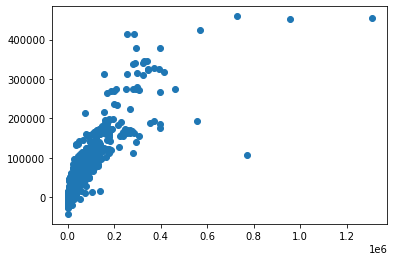

In [34]:
plt.scatter(y_test, y_pred)

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [37]:
y_pred = rf.predict(X_test)

In [38]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,5140,5140.00
1,8990,13283.26
2,8200,5548.57
3,22636,22387.24
4,24000,23944.27
...,...,...
5700,12450,12885.75
5701,19900,19956.61
5702,14364,14364.00
5703,5000,6605.28


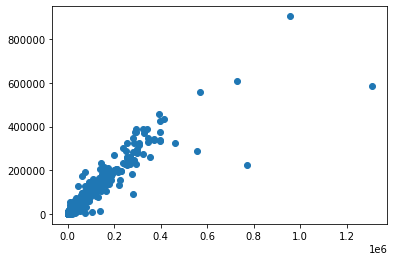

In [39]:
plt.scatter(y_test, y_pred)

In [40]:
from sklearn import metrics
print('R2:', rf.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Percentage Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2: 0.8844138690892618
Mean Absolute Error: 2790.6276300055138
Mean Percentage Absolute Error: 0.13340183396471458
Mean Squared Error: 222900310.41566858
Root Mean Squared Error: 14929.846295781768


### Decission Tree regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
y_pred = dtr.predict(X_test)

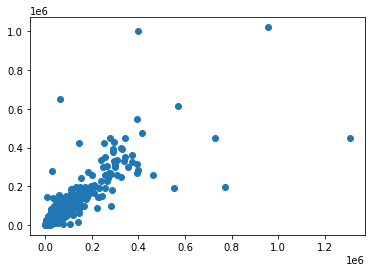

In [44]:
plt.scatter(y_test, y_pred)

In [45]:
print('R2:', dtr.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Percentage Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



R2: 0.7454113659418231
Mean Absolute Error: 3988.9943032427695
Mean Percentage Absolute Error: 0.1716787713955896
Mean Squared Error: 490957566.5586766
Root Mean Squared Error: 22157.562288272522


### Support Vector Regression

In [46]:
from sklearn.svm import SVR

In [47]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [48]:
y_pred = svr.predict(X_test)

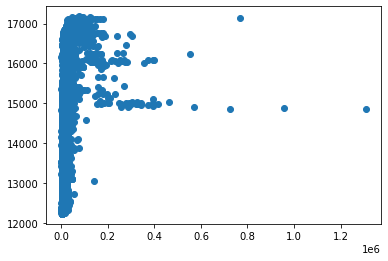

In [49]:
plt.scatter(y_test, y_pred)

In [50]:
print('R2:', svr.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Percentage Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: -0.021591190278107852
Mean Absolute Error: 13847.555319996176
Mean Percentage Absolute Error: 0.8119046518409502
Mean Squared Error: 1970071942.3401635
Root Mean Squared Error: 44385.49247603504
